In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv('/content/drive/MyDrive/AI/Data Analysis/student_performace/studentperformernes.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [220]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [221]:
df.duplicated().sum()

np.int64(0)

In [222]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [223]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [224]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [225]:
df.rename(columns={
        'race/ethnicity': 'race',
        'parental level of education': 'parent_education',
        'test preparation course': 'test_preparation_course',
        'math score': 'math_score',
        'reading score': 'reading_score',
        'writing score': 'writing_score',
    }, inplace=True
)


In [226]:
df.columns

Index(['gender', 'race', 'parent_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [227]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [228]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [229]:
pass_grade = 50

df['pass_math'] = 'yes'
filt = (df['math_score'] < pass_grade)
df.loc[filt,'pass_math'] = 'no'
df[['math_score', 'pass_math']].head()

df['pass_reading'] = 'yes'
filt = (df['reading_score'] < pass_grade)
df.loc[filt,'pass_reading'] = 'no'
df[['reading_score', 'pass_reading']].head()

df['pass_writing'] = 'yes'
filt = (df['writing_score'] < pass_grade)
df.loc[filt,'pass_writing'] = 'no'
df[['writing_score', 'pass_writing']].head()

df

,gender,race,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,yes,yes
1,female,group C,some college,standard,completed,69,90,88,yes,yes,yes
2,female,group B,master's degree,standard,none,90,95,93,yes,yes,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,no,yes,no
4,male,group C,some college,standard,none,76,78,75,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,yes,yes,yes
996,male,group C,high school,free/reduced,none,62,55,55,yes,yes,yes
997,female,group C,high school,free/reduced,completed,59,71,65,yes,yes,yes
998,female,group D,some college,standard,completed,68,78,77,yes,yes,yes


In [230]:
pass_math_count = df.groupby('pass_math')['pass_math'].count()
pass_math_count

,pass_math
pass_math,
no,135
yes,865


Average score in Math : 66.089
Average score in Reading : 69.169
Average score in Writing : 68.054




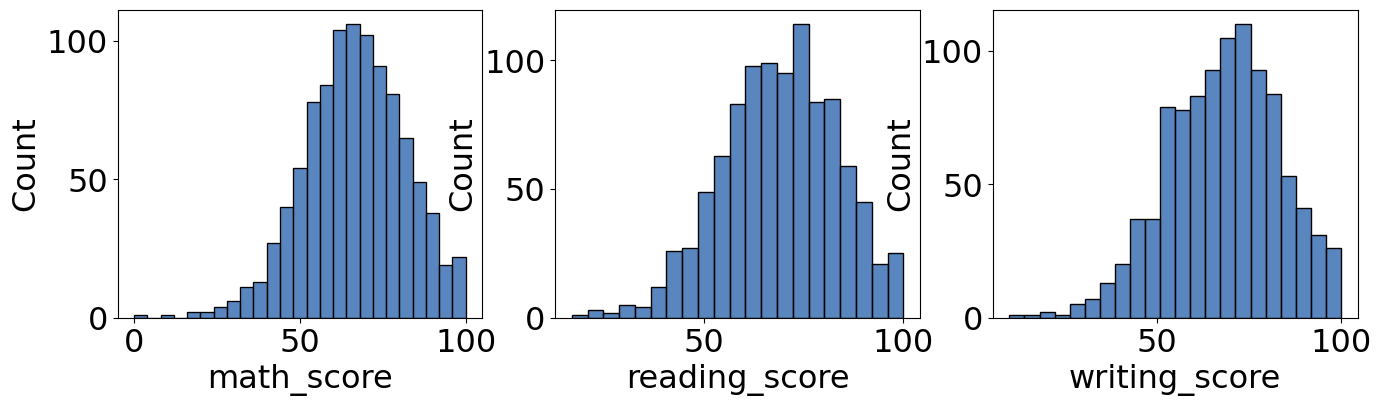

In [231]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

#ax
sns.histplot(x = 'math_score', data = df, ax = ax[0], color = '#225ea8')
sns.histplot(x = 'reading_score', data = df, ax = ax[1], color = '#225ea8')
sns.histplot(x = 'writing_score', data = df, ax = ax[2], color = '#225ea8')


math_mean = df['math_score'].mean()
reading_mean = df['reading_score'].mean()
writing_mean = df['writing_score'].mean()

print(f'Average score in Math : { math_mean }\nAverage score in Reading : { reading_mean }\nAverage score in Writing : { writing_mean }\n\n')
plt.show()

pass_math
no     135
yes    865
Name: pass_math, dtype: int64
pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64
pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64


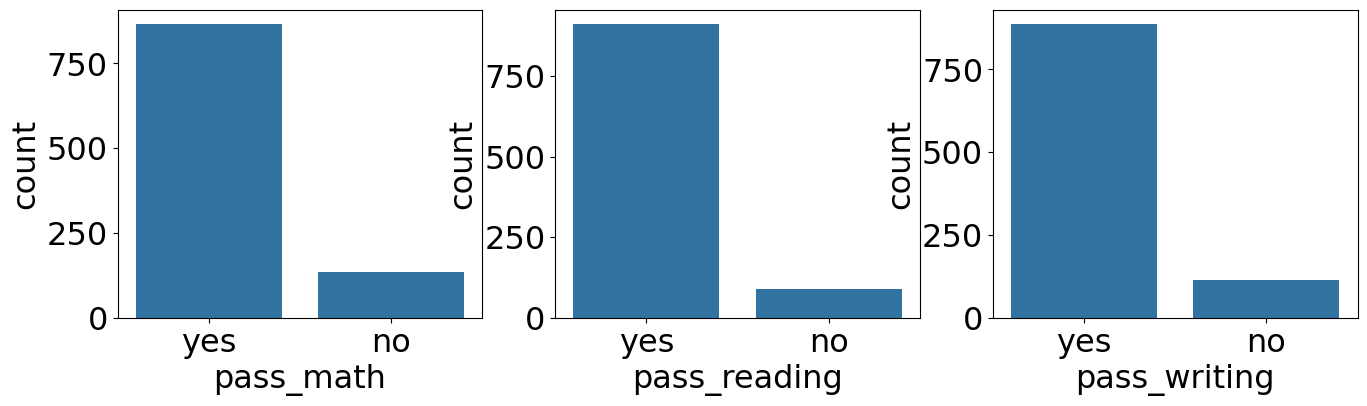

In [232]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

sns.countplot(x = 'pass_math', data = df, ax = ax[0])
sns.countplot(x = 'pass_reading', data = df, ax = ax[1])
sns.countplot(x = 'pass_writing', data = df, ax = ax[2])

pass_math_count = df.groupby('pass_math')['pass_math'].count()
print(pass_math_count)
pass_math_count = df.groupby('pass_reading')['pass_reading'].count()
print(pass_math_count)
pass_math_count = df.groupby('pass_writing')['pass_writing'].count()
print(pass_math_count)

plt.show()

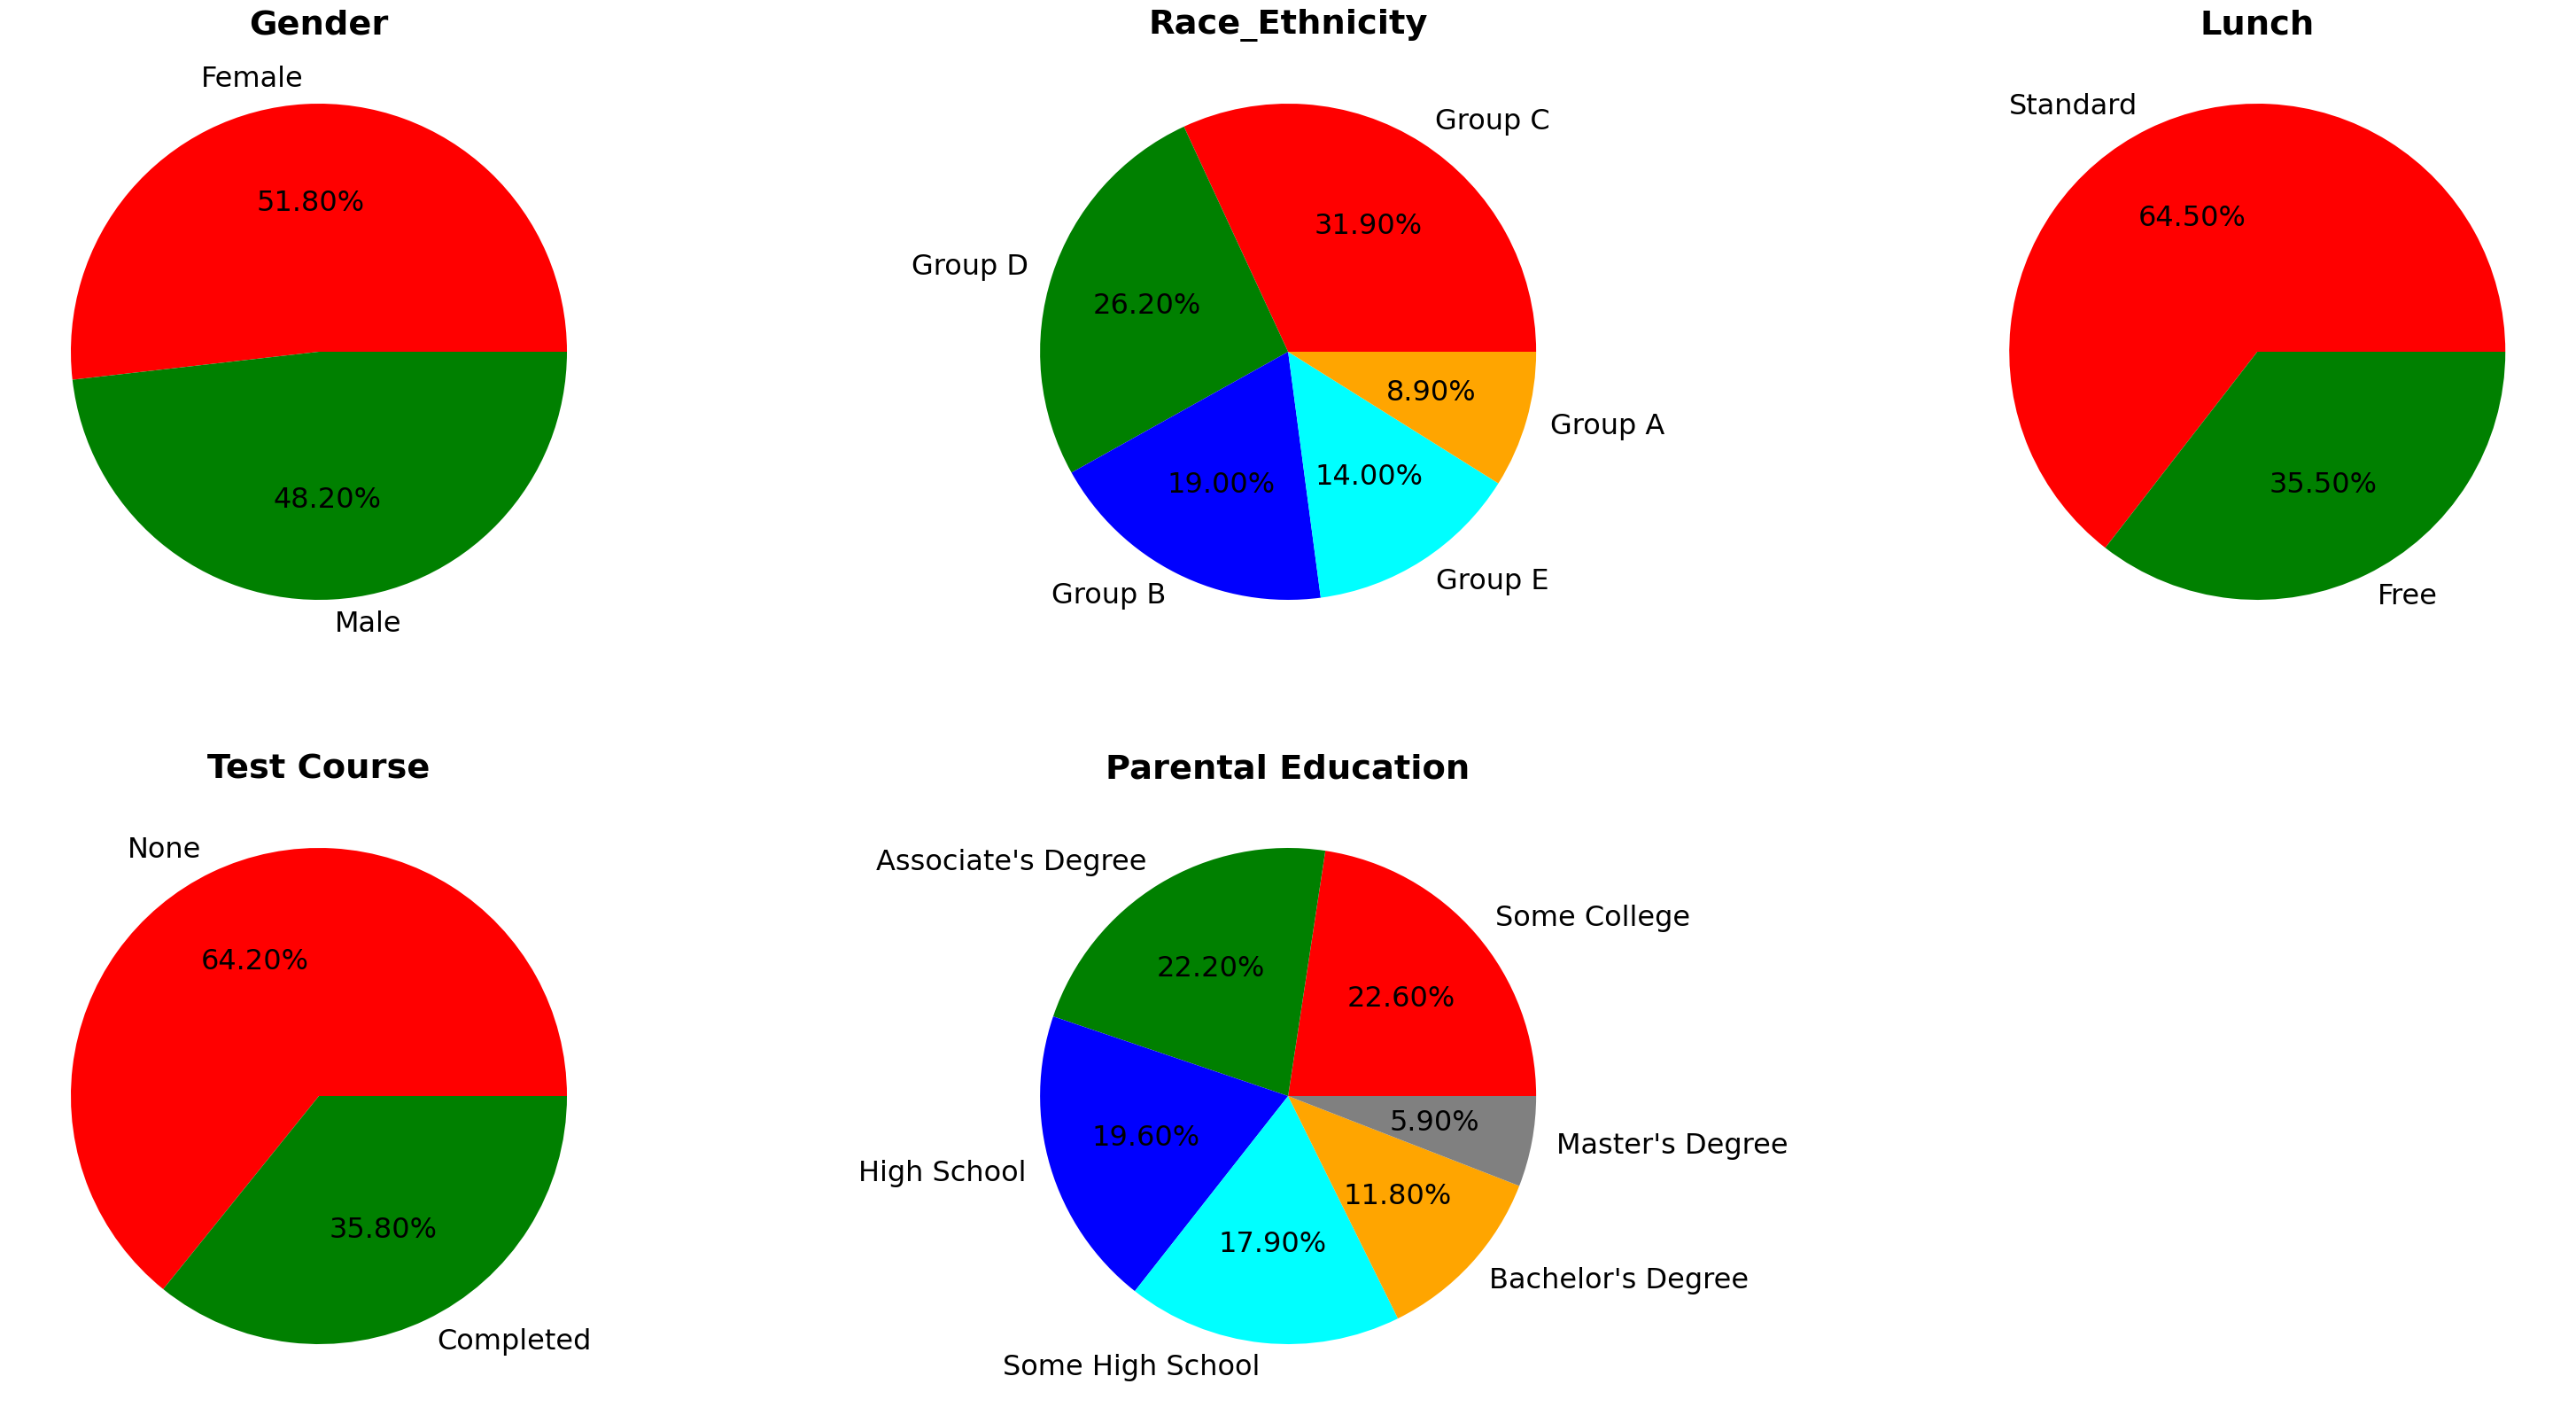

In [233]:
plt.rcParams['figure.figsize'] = (40, 20)
plt.rcParams['font.size'] = 23

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
#print(size)
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontweight='bold')


plt.subplot(2, 3, 2)
size = df['race'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels, autopct = '%.2f%%')
plt.title('Race_Ethnicity', fontweight='bold')


plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontweight='bold')


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, autopct = '%.2f%%')
plt.title('Test Course',fontweight='bold')


plt.subplot(2, 3, 5)
size = df['parent_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels, autopct = '%.2f%%')
plt.title('Parental Education', fontweight='bold')


plt.show()

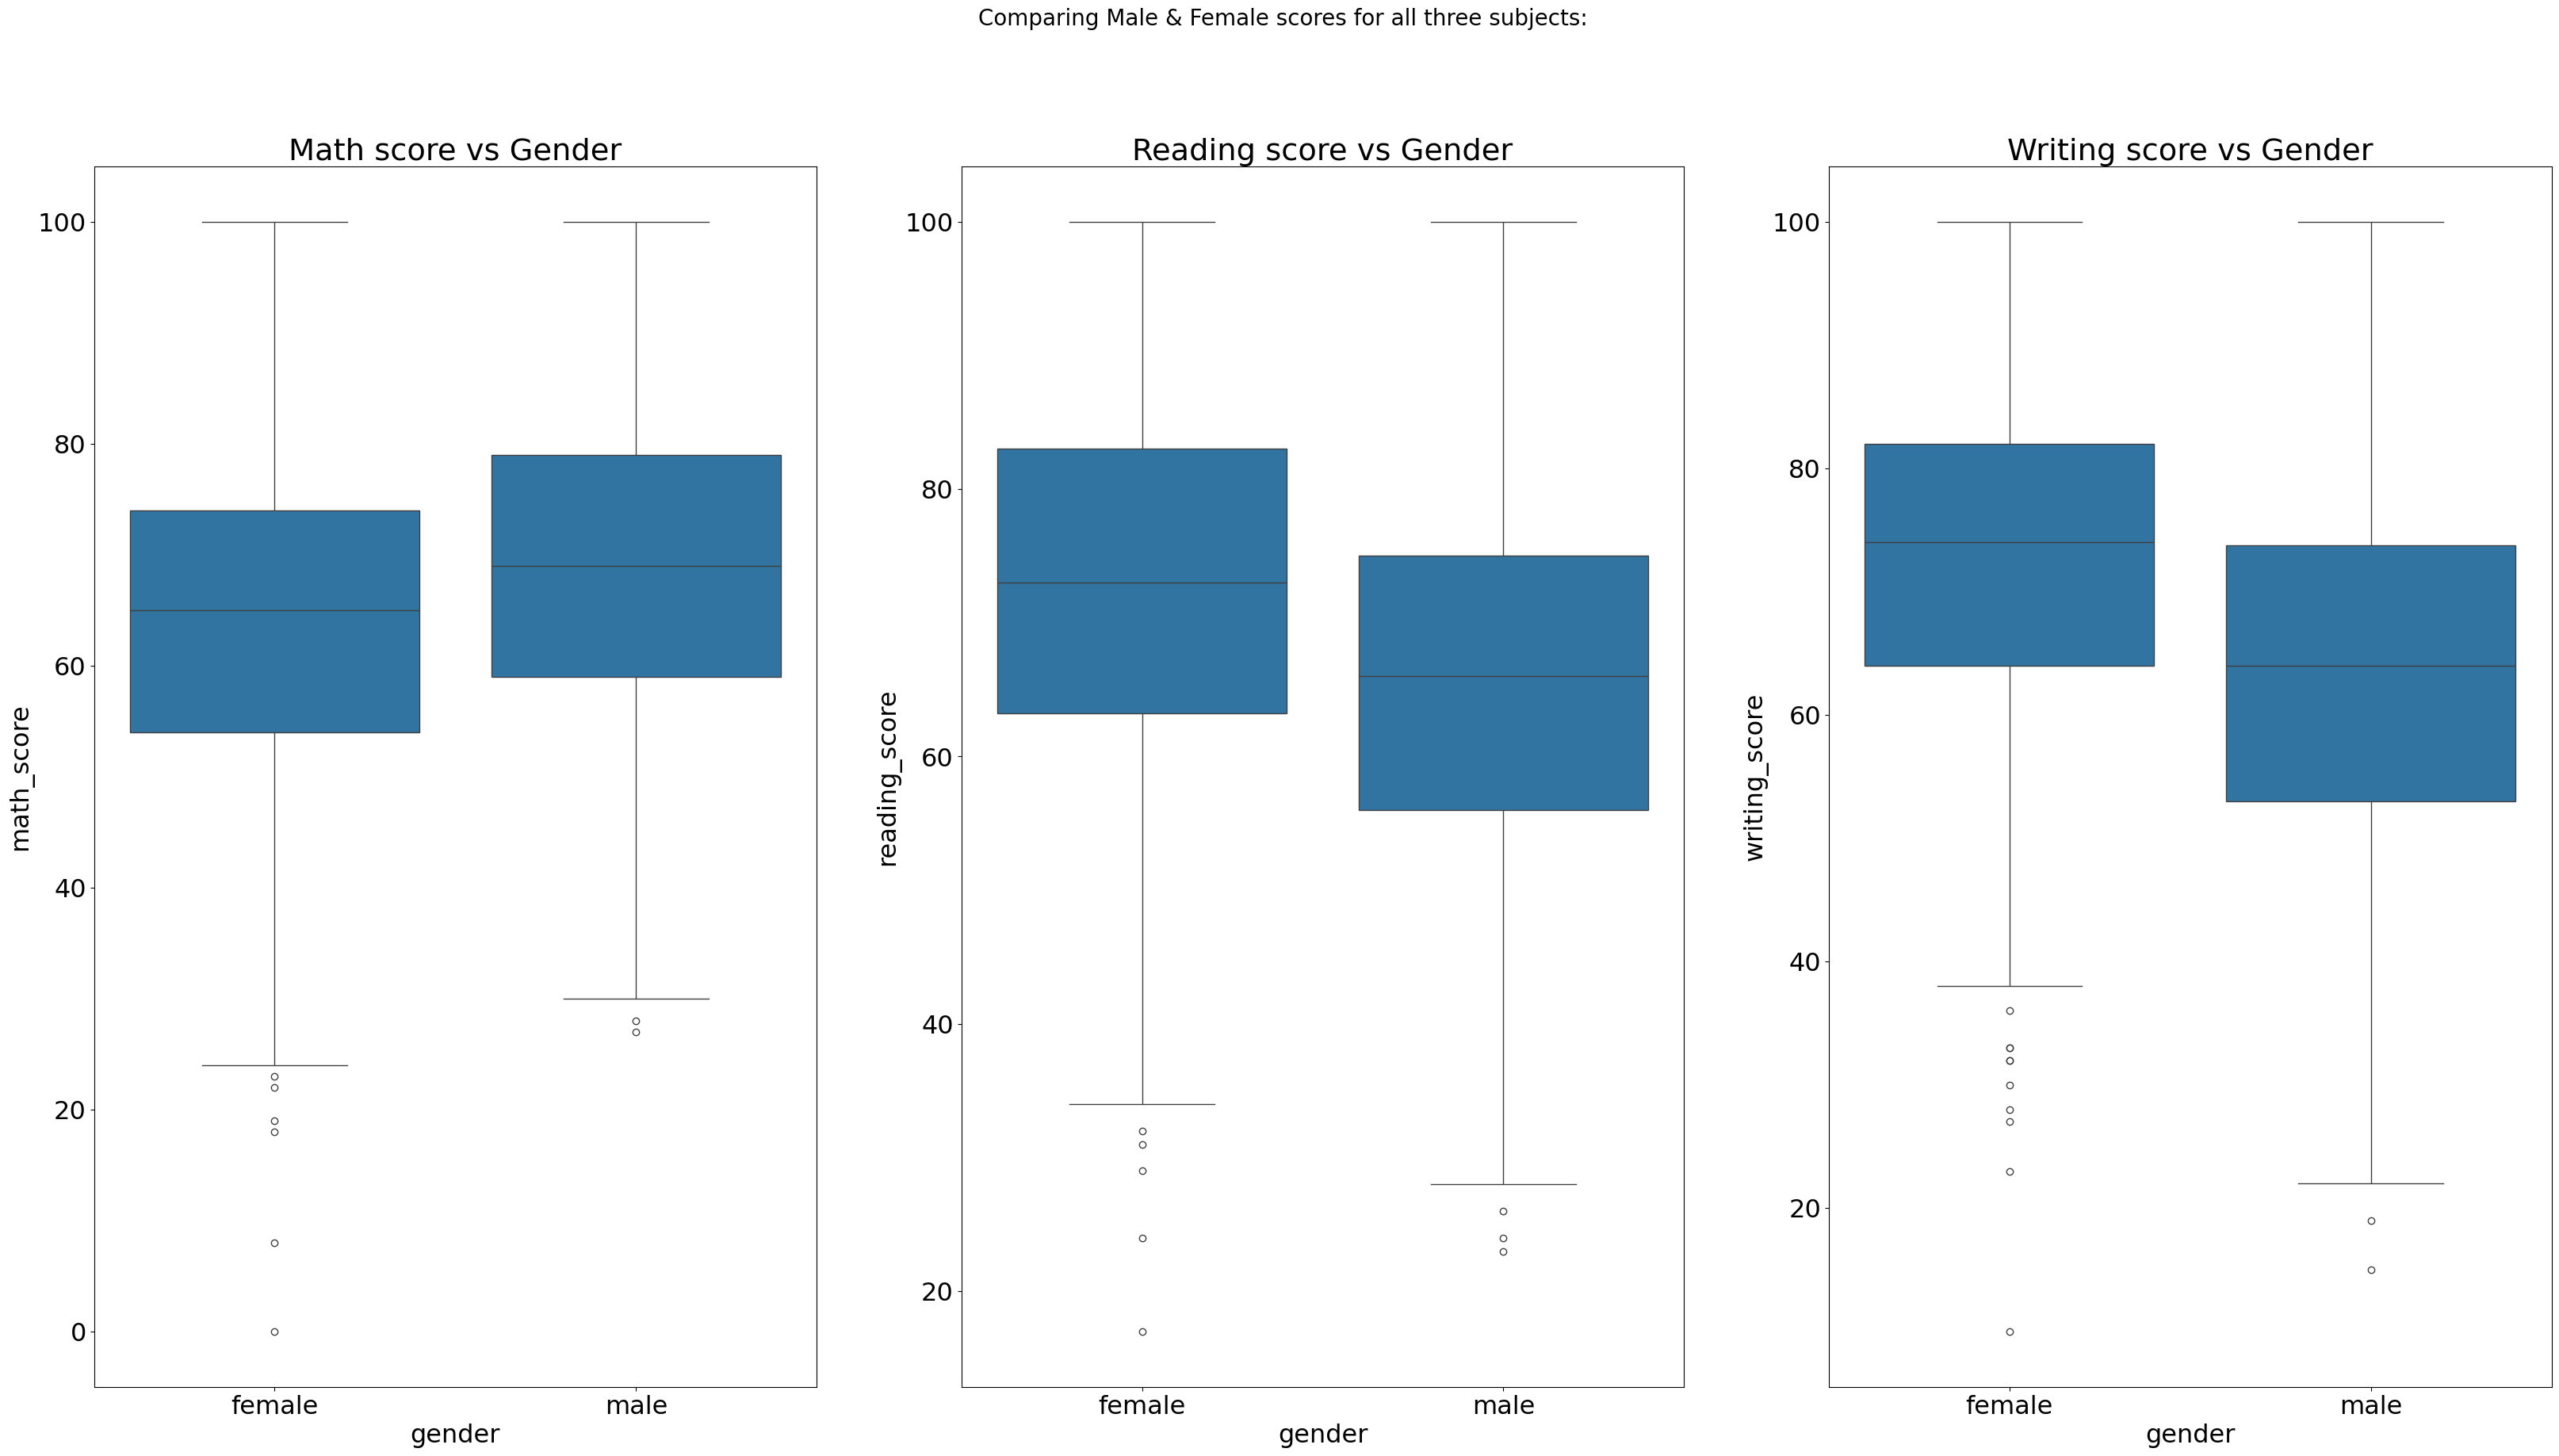

In [234]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Comparing Male & Female scores for all three subjects:', fontsize=20)
# Math score
sns.boxplot(x='gender', y='math_score', data=df, ax=ax1)
ax1.title.set_text('Math score vs Gender')
# Reading Score
sns.boxplot(x='gender', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('Reading score vs Gender')
# Writing Score
sns.boxplot(x='gender', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('Writing score vs Gender')

/tmp/ipython-input-77169462.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
/tmp/ipython-input-77169462.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
/tmp/ipython-input-77169462.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)


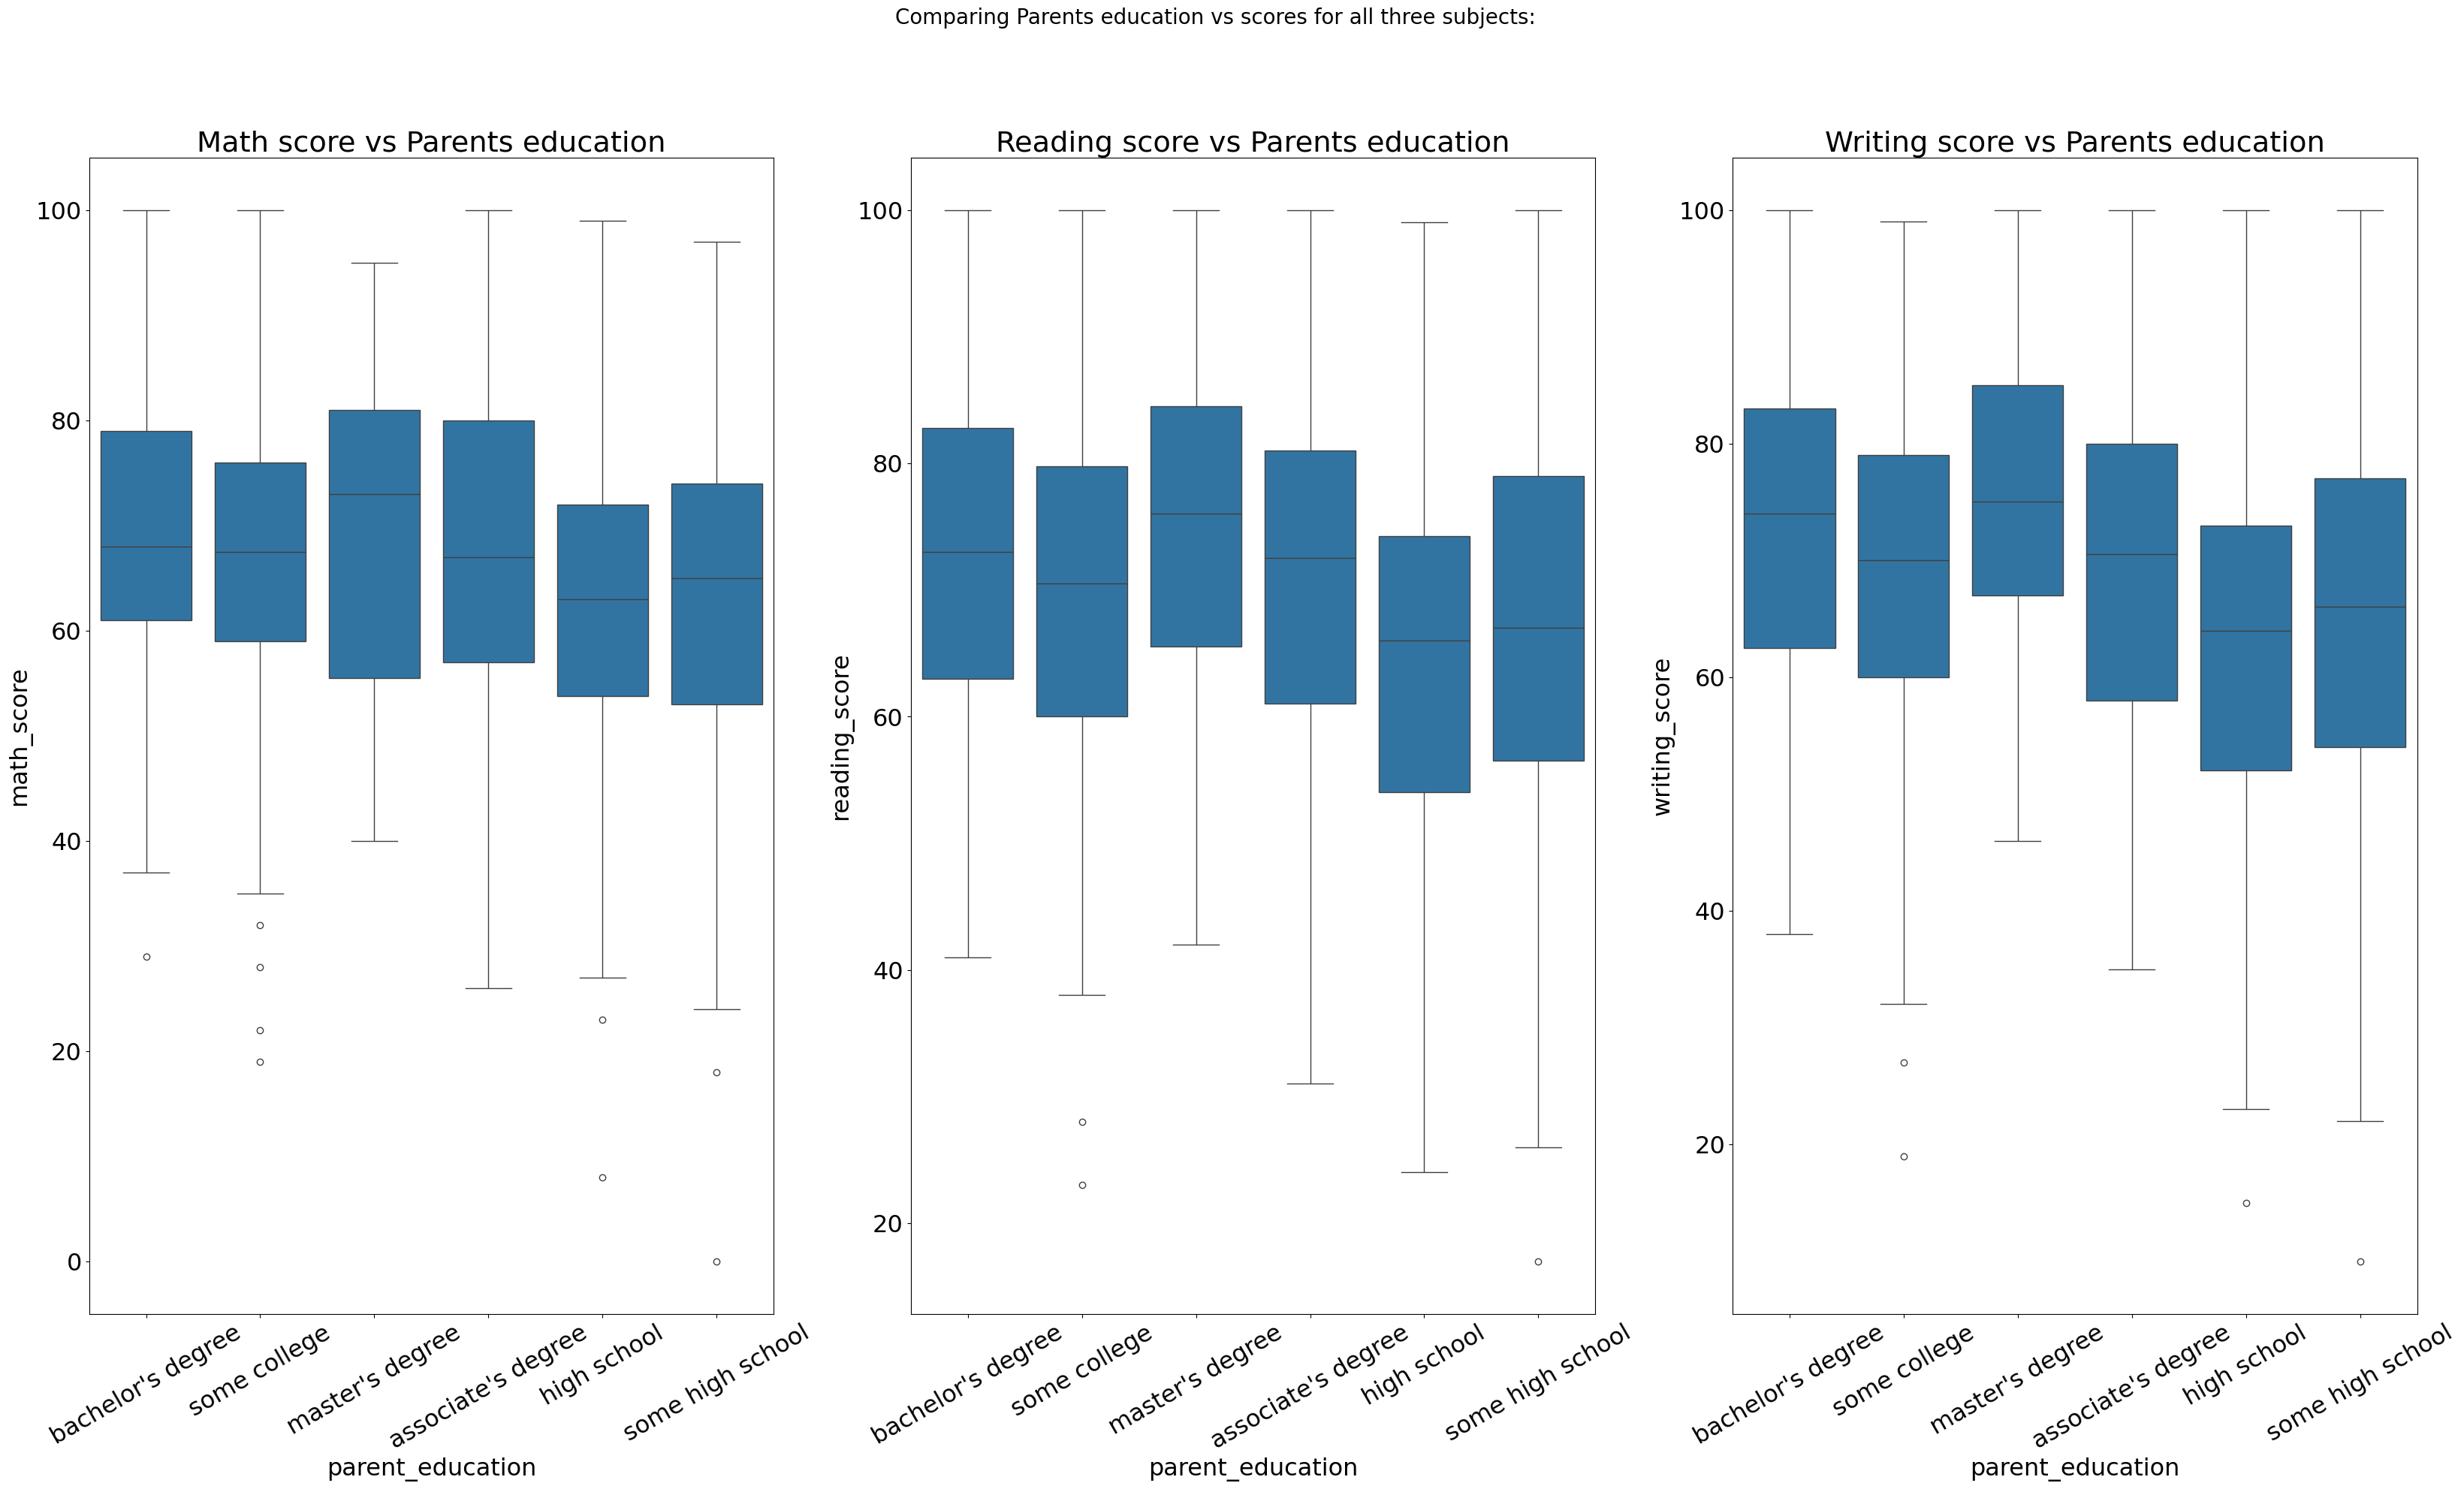

In [235]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Comparing Parents education vs scores for all three subjects:', fontsize=20)

# Math
sns.boxplot(x='parent_education', y='math_score', data=df, ax=ax1)
ax1.title.set_text('Math score vs Parents education')
var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

# Reading
sns.boxplot(x='parent_education', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('Reading score vs Parents education')
var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

# Writing
sns.boxplot(x='parent_education', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('Writing score vs Parents education')
var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)

In [236]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [237]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [238]:
df1 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_january.csv")
df1["month"]="Jan"
df2 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_febrary.csv")
df2["month"]="feb"
df3 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_may.csv")
df3["month"]="mar"
df4 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_2019.csv")
df4["month"]="apr"
df5 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_may.csv")
df5["month"]="may"
df6 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_june.csv")
df6["month"]="june"
df7 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_july.csv")
df7["month"]="july"
df8 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_Augest.csv")
df8["month"]="aug"
df9 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_september.csv")
df9["month"]="sep"
df10 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_october.csv")
df10["month"]="oct"
df11 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_november.csv")
df11["month"]="nov"
df12 = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/sales_december.csv")
df12["month"]="dec"

In [239]:
list=[df1 ,df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [240]:
for i in list:
    print(i.shape)

(9723, 7)
(12036, 7)
(16635, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [241]:
frame = pd.concat(list,  ignore_index=True)
frame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",dec
188255,319667,AA Batteries (4-pack),2,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",dec
188256,319668,Vareebadd Phone,1,400,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",dec
188257,319669,Wired Headphones,1,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",dec


In [242]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188259 entries, 0 to 188258
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          187703 non-null  object
 1   Product           187703 non-null  object
 2   Quantity Ordered  187703 non-null  object
 3   Price Each        187703 non-null  object
 4   Order Date        187703 non-null  object
 5   Purchase Address  187703 non-null  object
 6   month             188259 non-null  object
dtypes: object(7)
memory usage: 10.1+ MB


In [243]:
frame.isnull().sum()

,0
Order ID,556
Product,556
Quantity Ordered,556
Price Each,556
Order Date,556
Purchase Address,556
month,0


In [244]:
frame.duplicated().sum()

np.int64(1138)

In [245]:
frame.nunique()

,0
Order ID,163889
Product,20
Quantity Ordered,10
Price Each,18
Order Date,130613
Purchase Address,131591
month,12


In [246]:
frame['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

Data Cleaning and Analysis

In [247]:
frame.columns = [col.lower() for col in frame]
frame.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'month'],
      dtype='object')

In [248]:
frame.rename(columns={
        'order id': 'order_id',
        'quantity ordered': 'quantity_ordered',
        'price each': 'price_each',
        'order date': 'order_date',
        'purchase address': 'purchase_address',
    }, inplace=True
)

frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",dec
188255,319667,AA Batteries (4-pack),2,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",dec
188256,319668,Vareebadd Phone,1,400,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",dec
188257,319669,Wired Headphones,1,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",dec


In [249]:
(frame.isnull().sum().sum()) / len(frame) * 100

np.float64(1.7720268353704205)

In [250]:
frame = frame.dropna()
frame.isnull().sum()

,0
order_id,0
product,0
quantity_ordered,0
price_each,0
order_date,0
purchase_address,0
month,0


In [251]:
frame['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [252]:
frame['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', 'Price Each'], dtype=object)

In [253]:
df = frame[frame['quantity_ordered'] != "Quantity Ordered"]

In [254]:
df = frame[frame['price_each'] != "Price Each"]

In [255]:
df['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [256]:
df['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99'], dtype=object)

In [257]:
df = df.astype({"quantity_ordered": int, "price_each": float})

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187350 entries, 0 to 188258
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          187350 non-null  object 
 1   product           187350 non-null  object 
 2   quantity_ordered  187350 non-null  int64  
 3   price_each        187350 non-null  float64
 4   order_date        187350 non-null  object 
 5   purchase_address  187350 non-null  object 
 6   month             187350 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.4+ MB


In [259]:
df["sales"] = df["quantity_ordered"] * df["price_each"]
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",Jan,11.99
...,...,...,...,...,...,...,...,...
188254,319666,Lightning Charging Cable,1,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95
188255,319667,AA Batteries (4-pack),2,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68
188256,319668,Vareebadd Phone,1,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",dec,400.00
188257,319669,Wired Headphones,1,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",dec,11.99


In [260]:
month_sales = df.groupby('month')['sales'].agg(sales_sum = 'sum').sort_values(by="sales_sum", ascending=False).reset_index()
month_sales

,month,sales_sum
0,dec,4619297.12
1,oct,3736884.05
2,apr,3396059.11
3,nov,3198909.23
4,mar,3144584.80
5,may,3144584.80
6,july,2646899.69
7,june,2578293.30
8,aug,2244412.31
9,feb,2203481.24


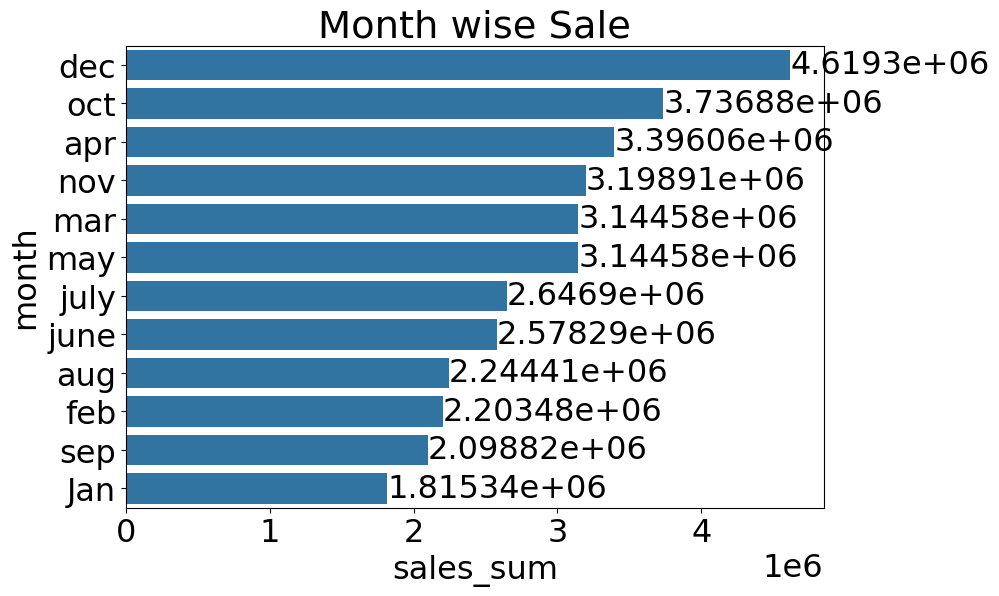

In [261]:
fig, ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(x = "sales_sum",
            y = "month",
            data = month_sales)

plt.title("Month wise Sale")

ax.bar_label(ax.containers[0])
plt.show()

In [262]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['city'] = df['purchase_address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX)


In [263]:
city_sales = df.groupby('city')['sales'].agg(city_sales = 'sum').sort_values(by="city_sales", ascending=False).reset_index()
city_sales

,city,city_sales
0,San Francisco (CA),8342366.35
1,Los Angeles (CA),5522285.37
2,New York City (NY),4730537.56
3,Boston (MA),3688266.34
4,Dallas (TX),2811378.21
5,Atlanta (GA),2802950.17
6,Seattle (WA),2739747.24
7,Portland (OR),1887024.81
8,Austin (TX),1825780.68
9,Portland (ME),477220.74


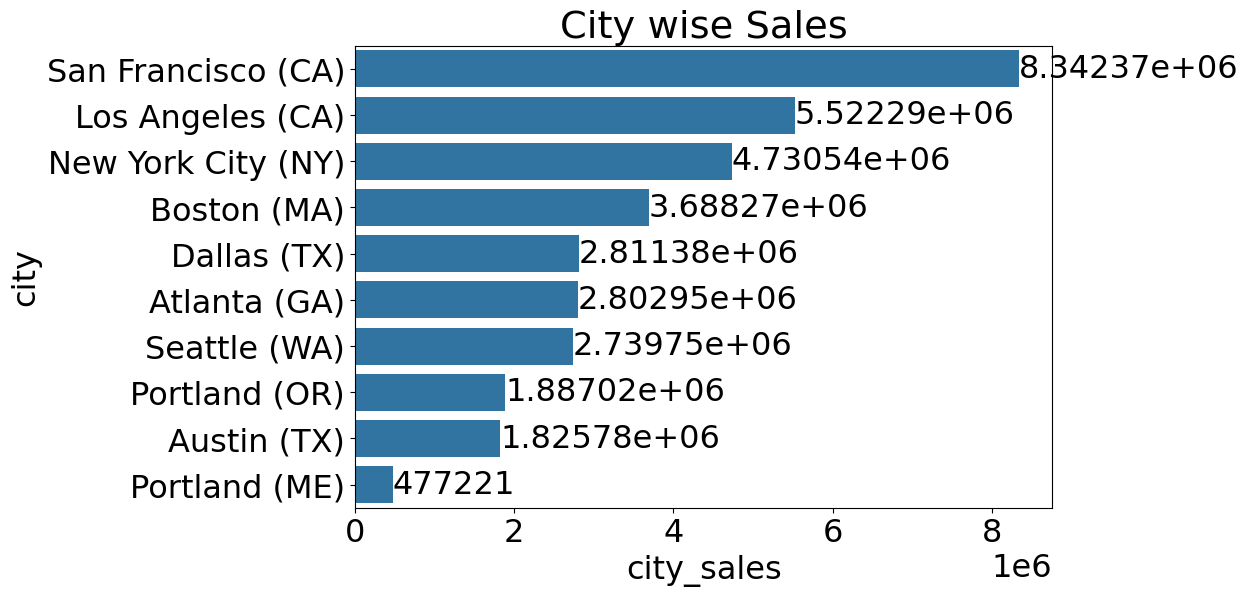

In [264]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.barplot(x = "city_sales",
            y = "city",
            data = city_sales)

plt.title("City wise Sales")
ax.bar_label(ax.containers[0])
plt.show()

In [265]:
df.nunique()

,0
order_id,163888
product,19
quantity_ordered,9
price_each,17
order_date,130612
purchase_address,131590
month,12
sales,54
city,10


In [266]:
df["product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [267]:
product_sales = df.groupby('product')['quantity_ordered'].agg(quantity_ordered = 'sum').sort_values(by="quantity_ordered", ascending=False).reset_index()
product_sales

,product,quantity_ordered
0,AAA Batteries (4-pack),31470
1,AA Batteries (4-pack),27802
2,USB-C Charging Cable,24100
3,Lightning Charging Cable,23419
4,Wired Headphones,20770
5,Apple Airpods Headphones,15699
6,Bose SoundSport Headphones,13434
7,27in FHD Monitor,7629
8,iPhone,6950
9,27in 4K Gaming Monitor,6307


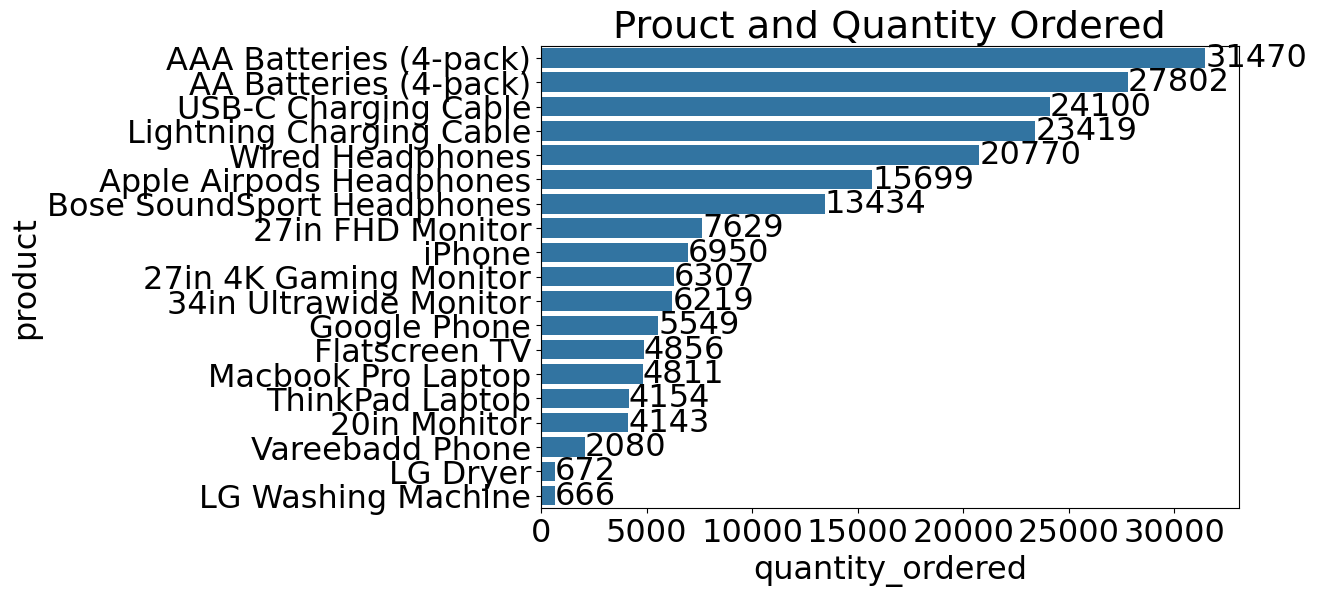

In [268]:
fig, ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(x = "quantity_ordered",
            y = "product",
            data = product_sales)

plt.title("Prouct and Quantity Ordered")

ax.bar_label(ax.containers[0])
plt.show()

In [269]:
time_sales = df
list_time = []
for i in time_sales['order_date']:
    list_time.append(i.split(" ")[1])

time_sales['time'] = list_time
time_sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA),21:25
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR),14:15
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA),13:33
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA),20:33
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX),11:59


In [270]:
time_sales = df.groupby('time')['sales'].agg(time_sales = 'sum').sort_values(by="time_sales", ascending=False).reset_index()
time_sales.head()

,time,time_sales
0,19:01,59018.56
1,19:16,58870.68
2,20:35,55433.86
3,12:21,54908.28
4,20:44,53824.10


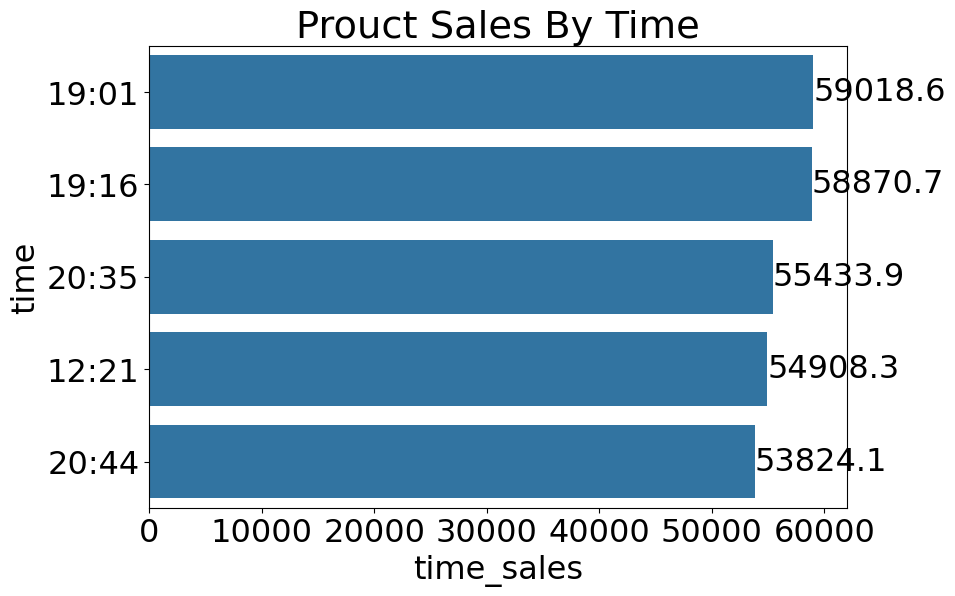

In [271]:
fig, ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(x = "time_sales",
            y = "time",
            data = time_sales.head())

plt.title("Prouct Sales By Time")

ax.bar_label(ax.containers[0])
plt.show()